In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
raw_player = pd.read_csv("data/player_overviews.csv") #Player overview dataset

In [4]:
raw_player = raw_player.loc[:, ["player_id", "first_name", "last_name", "flag_code", "height_cm"]]

In [6]:
raw_player.head()

,player_id,first_name,last_name,flag_code,height_cm
0,a002,Ricardo,Acuna,CHI,175.0
1,a001,Sadiq,Abdullahi,NGR,0.0
2,a005,Nelson,Aerts,BRA,188.0
3,a004,Egan,Adams,USA,178.0
4,a006,Ronald,Agenor,USA,180.0


In [7]:
raw_rankings = pd.read_csv("data/rankings.csv") #Players rankings dataset

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
raw_rankings = raw_rankings.loc[:, ["rank_number", "player_age", "ranking_points", "player_id", "week_year", "week_month"]]

In [10]:
raw_rankings = raw_rankings.rename(columns = {"week_year": "year", "week_month": "month"})

In [12]:
raw_rankings.head()

,rank_number,player_age,ranking_points,player_id,year,month
0,1,31.0,10645,n409,2017,11
1,2,36.0,9605,f324,2017,11
2,3,26.0,5150,d875,2017,11
3,4,20.0,4610,z355,2017,11
4,5,24.0,4015,tb69,2017,11


In [13]:
ranking_post_2010 = raw_rankings.loc[(raw_rankings["year"] >=2012) & (raw_rankings["month"] == 11) & (raw_rankings["rank_number"]<=200)] #Taking only the players who were in top 200 between 2012 and 2017

In [314]:
ranking_post_2010.head()

,rank_number,player_age,ranking_points,player_id,year,month
0,1,31.0,10645,n409,2017,11
1,2,36.0,9605,f324,2017,11
2,3,26.0,5150,d875,2017,11
3,4,20.0,4610,z355,2017,11
4,5,24.0,4015,tb69,2017,11


In [14]:
#Finding an average ranking for each player

In [315]:
rank_by_person = ranking_post_2010.groupby("player_id").mean()

In [316]:
avg_rank = rank_by_person.sort_values(by=['rank_number'])

In [317]:
avg_rank["id"] = avg_rank.index

In [318]:
avg_rank.head()

,rank_number,player_age,ranking_points,year,month,id
player_id,,,,,,
d643,2.708333,27.416667,11362.916667,2014.416667,11.0,d643
n409,3.958333,28.416667,7296.875000,2014.416667,11.0,n409
mc10,4.791667,27.416667,7084.166667,2014.416667,11.0,mc10
f324,5.208333,33.416667,7047.916667,2014.416667,11.0,f324
w367,7.208333,29.416667,4425.000000,2014.416667,11.0,w367


In [16]:
#Merging player overview and player ranking datasets

In [319]:
tennis_data = pd.merge(avg_rank, raw_player, how = "left", left_on = "id", right_on = "player_id")

In [320]:
tennis_data = tennis_data.drop(columns = ["year", "month", "id", "player_id"])

In [752]:
tennis_data

,rank_number,player_age,ranking_points,first_name,last_name,flag_code,height_cm,country_name
0,2.708333,27.416667,11362.916667,Novak,Djokovic,SRB,188.0,Serbia
1,3.958333,28.416667,7296.875000,Rafael,Nadal,ESP,185.0,Spain
2,4.791667,27.416667,7084.166667,Andy,Murray,GBR,191.0,United Kingdom
3,5.208333,33.416667,7047.916667,Roger,Federer,SUI,185.0,Switzerland
4,7.208333,29.416667,4425.000000,Stan,Wawrinka,SUI,183.0,Switzerland
5,8.541667,29.416667,3950.833333,Tomas,Berdych,CZE,196.0,Czech Republic
6,10.958333,29.416667,2809.375000,Jo-Wilfried,Tsonga,FRA,188.0,France
7,11.833333,23.416667,3164.791667,Milos,Raonic,CAN,196.0,Canada
8,12.041667,24.416667,3338.958333,Kei,Nishikori,JPN,178.0,Japan
9,12.583333,32.416667,4042.708333,David,Ferrer,ESP,175.0,Spain


In [ ]:
#Dataset that helps to convert flag codes to countries' names in player dataset

In [322]:
countries = pd.read_csv("data/all.csv") 

In [323]:
countries = countries.loc[:, ["name", "alpha-3"]]

In [17]:
#Merging the country and players dataset

In [324]:
tennis_data = pd.merge(tennis_data, countries, how = "left", left_on = "flag_code", right_on = "alpha-3")

In [325]:
tennis_data = tennis_data.rename(columns = {"name": "country_name"})

In [326]:
country_dict = {"SUI": "Switzerland", "CRO": "Croatia", "BUL": "Bulgaria", "GER": "Germany", "RSA": "South Africa", "LAT": "Latvia", "URU": "Uruguay", "POR": "Portugal", "NED": "Nederland", "TPE": "Taiwan", "CHI": "Chile", "SLO": "Slovenia", "BAR": "Barbados", "GRE": "Greece", "ESA": "El Salvador"}

In [18]:
#Adding country names that did not excist in country dataset manually

In [327]:
def add_countries(country):
    if country in country_dict.keys():
        return country_dict[country]
    else:
        return "NaN"

In [328]:
fixed_country = tennis_data.loc[tennis_data["country_name"].isnull(),'flag_code'].apply(add_countries)

In [329]:
tennis_data.loc[tennis_data["country_name"].isnull(), 'country_name'] = fixed_country

In [330]:
tennis_data.head()

,rank_number,player_age,ranking_points,first_name,last_name,flag_code,height_cm,country_name,alpha-3
0,2.708333,27.416667,11362.916667,Novak,Djokovic,SRB,188.0,Serbia,SRB
1,3.958333,28.416667,7296.875000,Rafael,Nadal,ESP,185.0,Spain,ESP
2,4.791667,27.416667,7084.166667,Andy,Murray,GBR,191.0,United Kingdom of Great Britain and Northern I...,GBR
3,5.208333,33.416667,7047.916667,Roger,Federer,SUI,185.0,Switzerland,NaN
4,7.208333,29.416667,4425.000000,Stan,Wawrinka,SUI,183.0,Switzerland,NaN


In [331]:
tennis_data = tennis_data.drop(columns = ["alpha-3"])

In [749]:
tennis_data.loc[tennis_data["country_name"] == "United Kingdom of Great Britain and Northern Ireland", "country_name"] = "United Kingdom"

In [333]:
tennis_data.loc[tennis_data["country_name"] == "Czechia", "country_name"] = "Czech Republic"

In [334]:
tennis_data.loc[tennis_data["country_name"] == "Russian Federation", "country_name"] = "Russia"

In [335]:
tennis_data.loc[tennis_data["country_name"] == "United States of America", "country_name"] = "United States"

In [336]:
tennis_data.loc[tennis_data["country_name"] == "Korea, Republic of", "country_name"] = "South Korea"

In [337]:
tennis_data.loc[tennis_data["country_name"] == "Moldova, Republic of", "country_name"] = "Moldova"

In [338]:
tennis_data.loc[tennis_data["country_name"] == "Nederland", "country_name"] = "Netherlands"

In [339]:
tennis_data.head()

,rank_number,player_age,ranking_points,first_name,last_name,flag_code,height_cm,country_name
0,2.708333,27.416667,11362.916667,Novak,Djokovic,SRB,188.0,Serbia
1,3.958333,28.416667,7296.875000,Rafael,Nadal,ESP,185.0,Spain
2,4.791667,27.416667,7084.166667,Andy,Murray,GBR,191.0,United Kingdom
3,5.208333,33.416667,7047.916667,Roger,Federer,SUI,185.0,Switzerland
4,7.208333,29.416667,4425.000000,Stan,Wawrinka,SUI,183.0,Switzerland


In [19]:
#Average temperature dataset

In [560]:
temp = pd.read_csv("data/table-1.csv")

In [561]:
temp = temp.rename(columns = {"'Average yearly temperature'": "avg_temp"})

In [562]:
temp.head()

,Country,avg_temp
0,Burkina Faso,28.25
1,Mali,28.25
2,Kiribati,28.20
3,Djibouti,28.00
4,Tuvalu,28.00


In [20]:
#Mergind players and temperature dataset

In [563]:
tempXtennis = pd.merge(tennis_data, temp, how = "left", left_on = "country_name", right_on = "Country")

In [564]:
tempXtennis = tempXtennis.drop(columns = ["Country"])

In [565]:
tempXtennis.loc[tempXtennis["country_name"] == "Taiwan", "avg_temp"] = "22.35"

In [21]:
#Countries' populations dataset 

In [566]:
population = pd.read_json("data/population.json")
population = population.loc[:, ["Country", "Year_2016", "Country_Code"]]

In [567]:
population.loc[population["Country"] == "Russian Federation", "Country"] = "Russia"

In [568]:
population.loc[population["Country"] == "Korea, Dem. People’s Rep.", "Country"] = "South Korea"

In [757]:
population.head()

,Country,Year_2016,Country_Code
0,Aruba,104822.0,ABW
1,Afghanistan,34656032.0,AFG
2,Angola,28813463.0,AGO
3,Albania,2876101.0,ALB
4,Andorra,77281.0,AND


In [22]:
#Merging players and population datasets

In [569]:
popXten = pd.merge(tempXtennis, population, how = "left", left_on = "country_name", right_on = "Country")

In [23]:
#Adding values that did not excist in population dataset manually

In [570]:
popXten.loc[popXten["country_name"] == "Slovakia", "Year_2016"] = 5433003.0

In [571]:
popXten.loc[popXten["country_name"] == "Taiwan", "Year_2016"] = 23540000.0

In [572]:
popXten.loc[popXten["country_name"] == "Egypt", "Year_2016"] = 94450000.0

In [573]:
popXten = popXten.rename(columns = {"Year_2016": "population"}).drop(columns = ["Country"])

In [574]:
popXten.dropna(subset = ["first_name"], inplace=True)

In [575]:
popXten.head()

,rank_number,player_age,ranking_points,first_name,last_name,flag_code,height_cm,country_name,avg_temp,population,Country_Code
0,2.708333,27.416667,11362.916667,Novak,Djokovic,SRB,188.0,Serbia,10.55,7057412.0,SRB
1,3.958333,28.416667,7296.875000,Rafael,Nadal,ESP,185.0,Spain,13.3,46443959.0,ESP
2,4.791667,27.416667,7084.166667,Andy,Murray,GBR,191.0,United Kingdom,8.45,65637239.0,GBR
3,5.208333,33.416667,7047.916667,Roger,Federer,SUI,185.0,Switzerland,5.5,8372098.0,CHE
4,7.208333,29.416667,4425.000000,Stan,Wawrinka,SUI,183.0,Switzerland,5.5,8372098.0,CHE


In [24]:
#GDP per capita dataset

In [576]:
gdp = pd.read_excel("data/gdp_per_cap.xlsx")

In [577]:
gdp = gdp.loc[:, ["Country Name", "2018 [YR2018]", "Country Code"]]

In [578]:
gdp.loc[gdp["Country Name"] == "Russian Federation", "Country Name"] = "Russia"

In [751]:
gdp.head()

,Country Name,2018 [YR2018],Country Code
0,Afghanistan,520.897,AFG
1,Albania,5268.85,ALB
2,Algeria,4114.72,DZA
3,American Samoa,11466.7,ASM
4,Andorra,42029.8,AND


In [25]:
#Merging players and gdp per capita datasets

In [579]:
final = pd.merge(popXten, gdp, how = "left", left_on = "country_name", right_on = "Country Name")

In [580]:
final.loc[final["country_name"] == "Taiwan", "2018 [YR2018]"] = 24390.0

In [581]:
final.loc[final["country_name"] == "Slovakia", "2018 [YR2018]"] = 16560.0

In [582]:
final.loc[final["country_name"] == "South Korea", "2018 [YR2018]"] = 27608.25

In [583]:
final.loc[final["country_name"] == "Egypt", "2018 [YR2018]"] = 3525.02

In [584]:
final = final.drop(columns = ["flag_code", "Country Name", "Country Code"])

In [585]:
final = final.rename(columns = {"Country_Code": "country_code", "2018 [YR2018]": "gdp_per_capita"})

In [26]:
#Creating a function that adds adjusted ranking column to the final dataframe

In [644]:
def adjusted_rankings(rank):
    if rank <= 5:
        return 5
    if rank <= 15:
        return 15
    if rank <= 25:
        return 25
    if rank <= 35:
        return 35
    if rank <= 45:
        return 45
    if rank <= 55:
        return 55
    if rank <= 75:
        return 75
    if rank <= 95:
        return 95
    if rank <= 105:
        return 105
    if rank <= 125:
        return 125
    if rank <= 145:
        return 145
    if rank <= 165:
        return 165
    if rank <= 185:
        return 185
    else:
        return 200

In [645]:
final["adjusted_rank"] = final["rank_number"].apply(adjusted_rankings)

In [667]:
final.head()

,rank_number,player_age,ranking_points,first_name,last_name,height_cm,country_name,avg_temp,population,country_code,gdp_per_capita,adjusted_rank
0,2.708333,27.416667,11362.916667,Novak,Djokovic,188.0,Serbia,10.55,7057412.0,SRB,7246.73,5
1,3.958333,28.416667,7296.875000,Rafael,Nadal,185.0,Spain,13.3,46443959.0,ESP,30370.9,5
2,4.791667,27.416667,7084.166667,Andy,Murray,191.0,United Kingdom,8.45,65637239.0,GBR,42943.9,5
3,5.208333,33.416667,7047.916667,Roger,Federer,185.0,Switzerland,5.5,8372098.0,CHE,82796.5,15
4,7.208333,29.416667,4425.000000,Stan,Wawrinka,183.0,Switzerland,5.5,8372098.0,CHE,82796.5,15


In [419]:
## final is the complete dataframe where I can get all the information needed for my analizes. 
#
#
#

In [27]:
#Creating a dataframe from which I can easily get data to make all the graphs

In [420]:
in_top200_by_country = final["country_name"].value_counts()

In [421]:
num_in_200 = in_top200_by_country.to_dict()

In [422]:
count_data = {'country': list(num_in_200.keys()), 'count_in_top_200': list(num_in_200.values())}

In [423]:
num_200_df = pd.DataFrame.from_dict(count_data)

In [424]:
num_200_df.head()

,country,count_in_top_200
0,United States,37
1,France,32
2,Spain,26
3,Germany,25
4,Argentina,21


In [425]:
graphs_df_0 = pd.merge(num_200_df, gdp, how = "left", left_on = "country", right_on = "Country Name")

In [426]:
graphs_df_1 = pd.merge(graphs_df_0, population, how = "left", left_on = "country", right_on = "Country")

In [427]:
graphs_final = pd.merge(graphs_df_1, temp, how = "left", left_on = "country", right_on = "Country")

In [428]:
graphs_final = graphs_final.loc[:, ["country", "count_in_top_200", "avg_temp", "2018 [YR2018]", "Year_2016"]]

In [429]:
graphs_final = graphs_final.rename(columns = {"2018 [YR2018]": "gdp_per_cap", "Year_2016": "population"})

In [28]:
#Adding missing values to the graphs dataframe manually

In [460]:
graphs_final.loc[graphs_final["country"] == "Egypt", "gdp_per_cap"] = 3525.02
graphs_final.loc[graphs_final["country"] == "Slovakia", "gdp_per_cap"] = 16560.0
graphs_final.loc[graphs_final["country"] == "Taiwan", "gdp_per_cap"] = 24390.0

graphs_final.loc[graphs_final["country"] == "Slovakia", "population"] = 5433003.0
graphs_final.loc[graphs_final["country"] == "Taiwan", "population"] = 23540000.0
graphs_final.loc[graphs_final["country"] == "Egypt", "population"] = 94450000.0

graphs_final.loc[graphs_final["country"] == "Taiwan", "avg_temp"] = float(22.35)
graphs_final.loc[graphs_final["country"] == "South Korea", "gdp_per_cap"] = 27608.25

In [491]:
def avg_temp(temp):
    if type(temp) == "str":
        return float(temp)
    else:
        return temp

In [492]:
graphs_final["avg_temp"] = graphs_final["avg_temp"].apply(avg_temp)

In [493]:
graphs_final["top_200_per_1m"] = (graphs_final["count_in_top_200"]*1000000/graphs_final["population"])

In [494]:
graphs_final.head()

,country,count_in_top_200,avg_temp,gdp_per_cap,population,top_200_per_1m
0,United States,37,8.55,62794.6,323127513.0,0.114506
1,France,32,10.70,41463.6,66896109.0,0.478354
2,Spain,26,13.30,30370.9,46443959.0,0.559814
3,Germany,25,8.50,47603,82667685.0,0.302416
4,Argentina,21,14.80,11683.9,43847430.0,0.478933


In [495]:
#this is the df from where I can make graphs.
#
#
#

Text(0.5, 1, 'Relationship Between the Average Temperature and Players in Top 200 Per Million People')

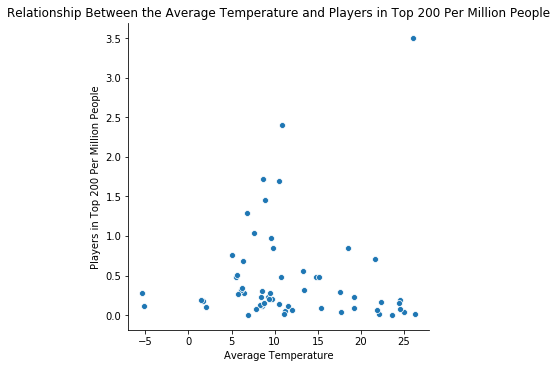

In [748]:
plot = sns.relplot(x = "avg_temp", y = "top_200_per_1m", data = graphs_final, legend=False)
plt.xlabel("Average Temperature")
plt.ylabel("Players in Top 200 Per Million People")
plt.title("Relationship Between the Average Temperature and Players in Top 200 Per Million People")

Text(0.5, 1.0, 'Histogram of Average Temperatures')

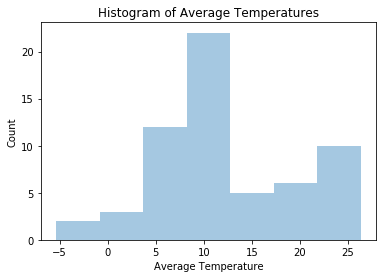

In [747]:
sns.distplot(graphs_final["avg_temp"], kde=False)
#plt.fig.set_size_inches(10,10)
plt.xlabel("Average Temperature")
plt.ylabel("Count")
plt.title("Histogram of Average Temperatures")

In [648]:
gdp_rank_df = final.loc[:, ["adjusted_rank", "gdp_per_capita"]]

In [649]:
gdp_rank_df.head()

,adjusted_rank,gdp_per_capita
0,5,7246.73
1,5,30370.9
2,5,42943.9
3,15,82796.5
4,15,82796.5


In [650]:
gdp_rank_df["adjusted_rank"] = gdp_rank_df["adjusted_rank"].astype(str)

In [651]:
gdp_rank_df["gdp_per_capita"] = gdp_rank_df["gdp_per_capita"].astype(int)

In [652]:
gdp_rank_df = gdp_rank_df.groupby("adjusted_rank").mean()

In [653]:
gdp_rank_df["rank"] = gdp_rank_df.index

In [655]:
gdp_rank_df["rank"] = gdp_rank_df["rank"].astype(int)

In [659]:
gdp_rank_df = gdp_rank_df.sort_values(by = 'rank')
gdp_rank_df.head()

,gdp_per_capita,rank
adjusted_rank,,
5,26853.000000,5
15,45116.625000,15
25,37843.000000,25
35,35228.375000,35
45,45980.909091,45


Text(0.5, 1, 'Relationship Between Rankings and GDP Per Capita')

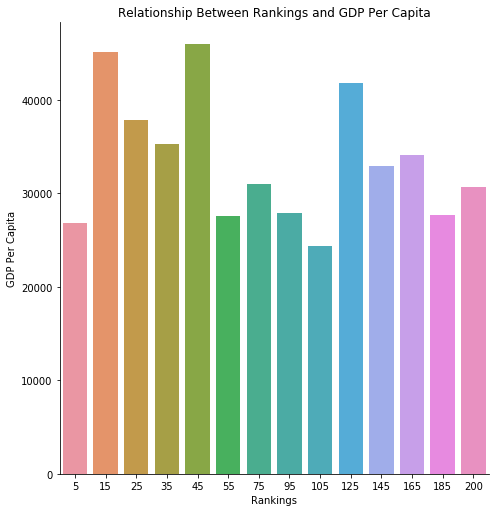

In [735]:
sns.catplot(x = "rank", y = "gdp_per_capita", kind = "bar", data = gdp_rank_df, height = 7)
#plot = sns.relplot(x = "avg_w_length", y = "len_list", data = reuters_articles, legend=False)
plot.fig.set_size_inches(10,10)
plt.xlabel("Rankings")
plt.ylabel("GDP Per Capita")
plt.title("Relationship Between Rankings and GDP Per Capita")

In [681]:
height_raw = final.loc[~final["height_cm"].isnull()]

In [690]:
height = height_raw.loc[:, ["height_cm", "rank_number", "adjusted_rank"]]

In [693]:
height.loc[height["height_cm"] == 0.0] = 183.0

Text(0.5, 1.0, 'Relationship Between Ranking And Player Height')

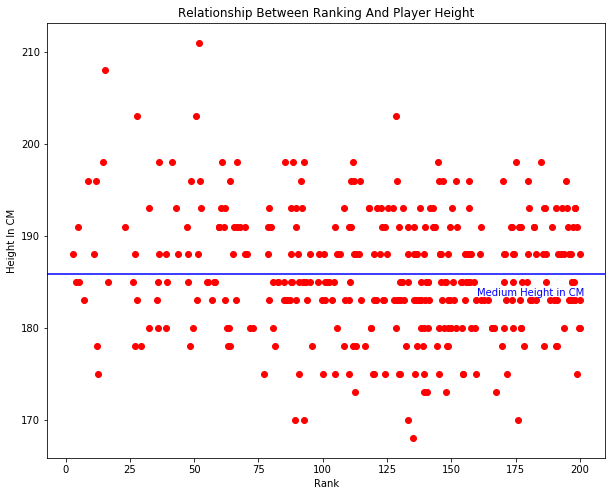

In [741]:
fig, ax2=plt.subplots(figsize=(10,8))
ax2.scatter(height["rank_number"], height["height_cm"], color="red", marker="o")
ax2.set_xlabel("Rank", fontsize=10)
ax2.set_ylabel("Height In CM", fontsize=10)
ax2.axhline(height["height_cm"].mean(), color="blue")
ax2.text(x= 160, y=183.5, s="Medium Height in CM", color="blue")
ax2.set_title("Relationship Between Ranking And Player Height")